# Test ipynb file using Octave kernel

`TEST_VBAP_SCRIPTS.m` cannot be run directly in octave, so I fixed errors in this notebook.

In [124]:
!octave --version

octave: X11 DISPLAY environment variable not set
octave: disabling GUI features
GNU Octave, version 5.2.0
Copyright (C) 2020 John W. Eaton and others.
This is free software; see the source code for copying conditions.
There is ABSOLUTELY NO WARRANTY; not even for MERCHANTABILITY or
FITNESS FOR A PARTICULAR PURPOSE.

Octave was configured for "x86_64-pc-linux-gnu".

Additional information about Octave is available at https://www.octave.org.

Please contribute if you find this software useful.
For more information, visit https://www.octave.org/get-involved.html

Read https://www.octave.org/bugs.html to learn how to submit bug reports.



In [125]:
!gnuplot --version

gnuplot 5.2 patchlevel 8



scalar cannot be indexed with .
error: called from
    TEST_VBAP_SCRIPTS at line 93 column 26
    run at line 86 column 5


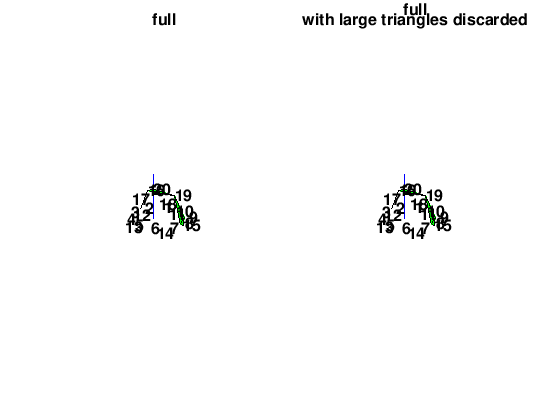

In [1]:
run('TEST_VBAP_SCRIPTS')

## EXAMPLE 1: Triangulation

Triangulation of 3D setups is done using the convex hull of the
loudspeaker points on the unit sphere (equivalent to Delaunay
triangulation)

In [94]:
% FULL SPHERE EXAMPLE OF 29 SPEAKERS
ls_dirs_full = [-18 -54 -90 -126 -162 -198 -234 -270 -306 -342  0    -72  -144 -216 -288 -45  -135 -225 -315 0;
                 0   0   0   0    0    0    0    0    0    0   -10   -10  -10  -10  -10   45   45   45   45  90]';

In [95]:
% Delaunay triangulation
[~, ls_full] = findLsTriplets(ls_dirs_full);

findLsTriplets function
```
function [ls_groups, mesh] = findLsTriplets(ls_dirs, OMIT_LARGE_TRI, aperture_lim)

FINDLSTRIPLETS Returns valid loudspeaker triplets for 3D layouts
   INPUTS:

   ls_dirs: (Nspeakers x 2) matrix of loudspeaker directions in degrees, 
       in azimuth elevation convention
   OMIT_LARGE_TRI: {0,1} False to return all triplets, true to keep only
       ones that their larger side has a span less than a limit set in 
       aperture_lim. If not set, all valid triplets are returned.
   aperture_lim: span limit in degrees above which respective triplets are
       omitted

   OUTPUTS:

   ls_groups: (Ntriplets x 3) matrix. Each row has the speaker indices
       corresponding to a valid triplet
```

In [96]:
ls_full

ls_full =

  scalar structure containing the fields:

    vert =

       0.95106  -0.30902   0.00000
       0.58779  -0.80902   0.00000
       0.00000  -1.00000   0.00000
      -0.58779  -0.80902   0.00000
      -0.95106  -0.30902   0.00000
      -0.95106   0.30902   0.00000
      -0.58779   0.80902   0.00000
      -0.00000   1.00000   0.00000
       0.58779   0.80902   0.00000
       0.95106   0.30902   0.00000
       0.98481   0.00000  -0.17365
       0.30432  -0.93661  -0.17365
      -0.79673  -0.57886  -0.17365
      -0.79673   0.57886  -0.17365
       0.30432   0.93661  -0.17365
       0.50000  -0.50000   0.70711
      -0.50000  -0.50000   0.70711
      -0.50000   0.50000   0.70711
       0.50000   0.50000   0.70711
       0.00000   0.00000   1.00000

    faces =

        1    2   12
        1   10   19
        1   11   10
        1   12   11
        1   16    2
        1   19   16
        2    3   12
        2   16    3
        3    4   12
        3   16   17
        3   17    4


### OMITTING LARGE TRIANGLES:

In many cases (like the setup above), it is advantageous to remove very
large triangles (with aperture>~100deg) that are going to result in unstable 
localization, such as the ones below -10deg elevation in the example configuration 
above (see next plot). If you use this, always check visually the triangulation 
to be sure that you haven't omitted by mistake some triangle that you would 
like to keep. An alternative strategy is to introduce virtual loudspeakers 
that their channels are then either discarded or mixed with the actual ones.

In [97]:
% omit large triangles
OMIT_LARGE_TRI = 1;
large_tri_aperture = 100; % largest allowed triangle side in degrees
[~, ls_full_omit] = findLsTriplets(ls_dirs_full, OMIT_LARGE_TRI, large_tri_aperture);

In [98]:
ls_full_omit

ls_full_omit =

  scalar structure containing the fields:

    vert =

       0.95106  -0.30902   0.00000
       0.58779  -0.80902   0.00000
       0.00000  -1.00000   0.00000
      -0.58779  -0.80902   0.00000
      -0.95106  -0.30902   0.00000
      -0.95106   0.30902   0.00000
      -0.58779   0.80902   0.00000
      -0.00000   1.00000   0.00000
       0.58779   0.80902   0.00000
       0.95106   0.30902   0.00000
       0.98481   0.00000  -0.17365
       0.30432  -0.93661  -0.17365
      -0.79673  -0.57886  -0.17365
      -0.79673   0.57886  -0.17365
       0.30432   0.93661  -0.17365
       0.50000  -0.50000   0.70711
      -0.50000  -0.50000   0.70711
      -0.50000   0.50000   0.70711
       0.50000   0.50000   0.70711
       0.00000   0.00000   1.00000

    faces =

        1    2   12
        1   10   19
        1   11   10
        1   12   11
        1   16    2
        1   19   16
        2    3   12
        2   16    3
        3    4   12
        3   16   17
        3   17 

In [122]:
size(ls_full.vert)
size(ls_full.faces)
size(ls_full_omit.vert)
size(ls_full_omit.faces)

ans =

   20    3

ans =

   36    3

ans =

   20    3

ans =

   33    3



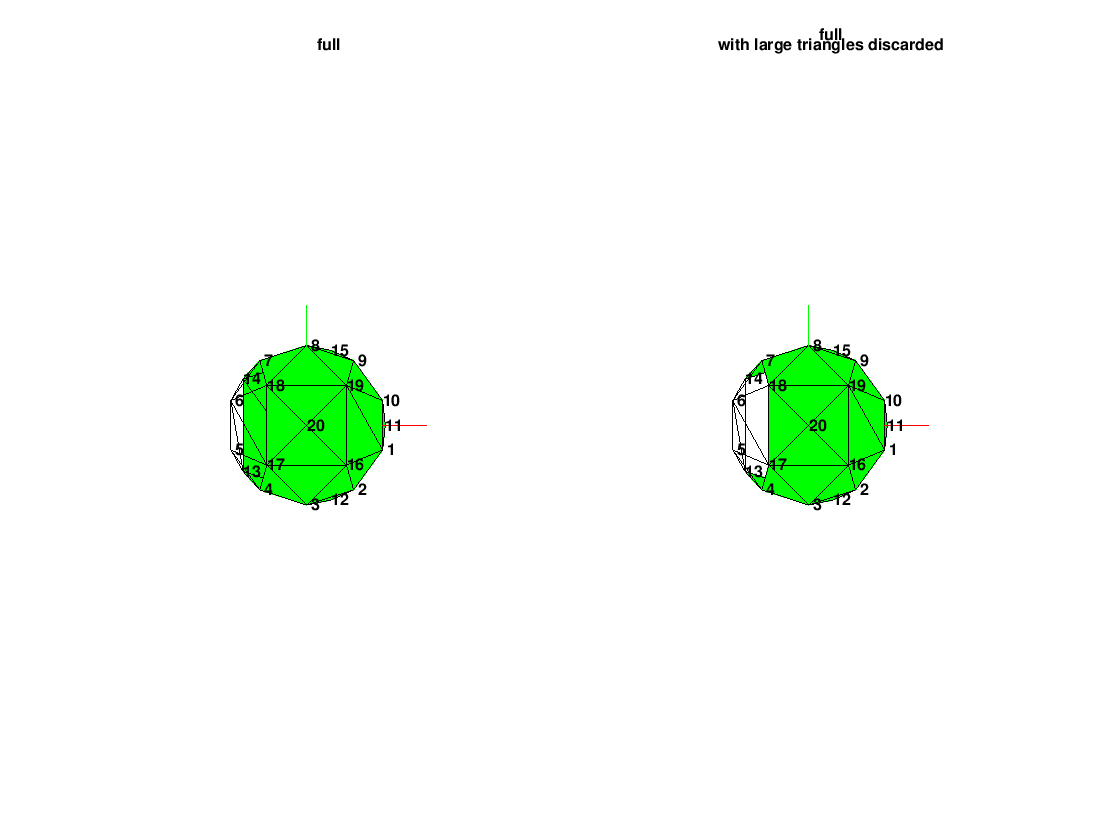

In [123]:
% plot triangulations
% note: patch in octave doesn't work well, so we can't use view and zoom after patch
figure
subplot(121)
plotTriangulation(ls_full)
title('full'), set(findall(gca, 'type', 'text'), 'visible', 'on', 'fontsize',16) % make title visible
#view(60,-20), zoom(2)
subplot(122)
plotTriangulation(ls_full_omit)
title(['full' char(10) 'with large triangles discarded']), set(findall(gca, 'type', 'text'), 'visible', 'on', 'fontsize',16)
#view(60,-20), zoom(2)

# h = gcf; h.Position(3:4) = 2*h.Position(3:4);  % error occurs in octave
h = gcf;
pos = get(h, 'Position');
pos(3:4) .*= 2;
set(h, 'Position', pos)

## PARTIAL SETUP OF LOUDSPEAKERS

Partial setups can be domes, or setups around a screen, etc. In this case
loudspeaker triplets should be discarded when their normals do not point
outwards. This is handled automatically by the findLsTriplets() function.

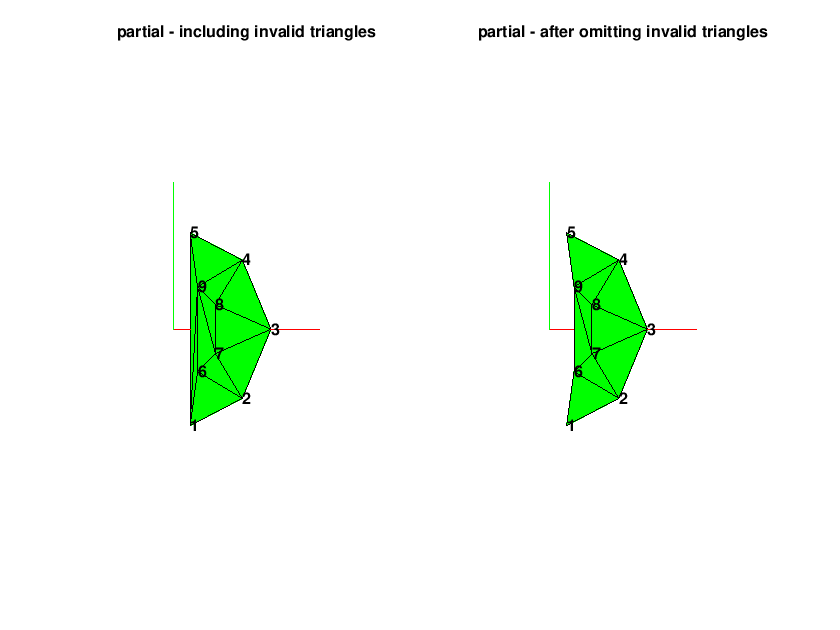

In [127]:
% define a partial frontal setup
ls_dirs_partial = [-80 -45 0 45 80 -60 -30 30 60;
                    0   0  0 0  0   60  60 60 60]';
                    
% triangulate directly, without considering invalid triangles
ls_dirs_rad = ls_dirs_partial*pi/180;
[tempx, tempy, tempz] = sph2cart(ls_dirs_rad(:,1), ls_dirs_rad(:,2), 1);
ls_part_invalid.vert = [tempx, tempy, tempz];
ls_part_invalid.faces = convhulln(ls_part_invalid.vert);

% trinagulate and discard invalid faces
[~, ls_part_valid] = findLsTriplets(ls_dirs_partial);

% plot triangulation
figure
subplot(121)
plotTriangulation(ls_part_invalid)
title('partial - including invalid triangles'), set(findall(gca, 'type', 'text'), 'visible', 'on', 'fontsize',16)
#view(3), zoom(1.5)
subplot(122)
plotTriangulation(ls_part_valid)
title('partial - after omitting invalid triangles'), set(findall(gca, 'type', 'text'), 'visible', 'on', 'fontsize',16)
#view(3), zoom(1.5)
#h = gcf; h.Position(3:4) = 1.5*h.Position(3:4);
h = gcf;
pos = get(h, 'Position');
pos(3:4) .*= 1.5;
set(h, 'Position', pos)

## EXAMPLE 2: VBAP Gains

The steps to obtaining the VBAP gains for a set of directions are:

In [128]:
% a) define loudspeaker setup ls_dirs = [azi1 azi2 ... aziK] for 2D
%    or  ls_dirs = [azi1 elev1; azi2 elev2; ...; aziK elevK] for 3D
ls_dirs = [30 -30 0 110 -110]; % define a 2D 5.0 setup in degrees
%
% b) find valid loudspeaker pairs or triplets:
%    findLsPairs(ls_dirs) for 2D, or
%    findLsTriplets(ls_dirs) for 3D
ls_groups = findLsPairs(ls_dirs);
%
% c) compute inverse matrices for loudspeaker pairs or triplets, needs to 
%    be done once for any panning direction
layoutInvMtx = invertLsMtx(ls_dirs, ls_groups);
%
% d) compute vbap gains for the required source directions, in degrees
src_dirs2D = (0:359)'; % 2D panning directions at every 1deg
gains2D = vbap(src_dirs2D, ls_groups, layoutInvMtx); % compute vbap gains

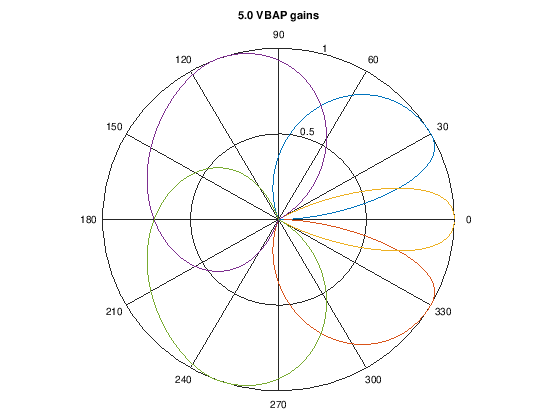

In [129]:
% Plot panning gains
figure
polar(src_dirs2D*ones(1,5)*pi/180, gains2D)
title('5.0 VBAP gains')

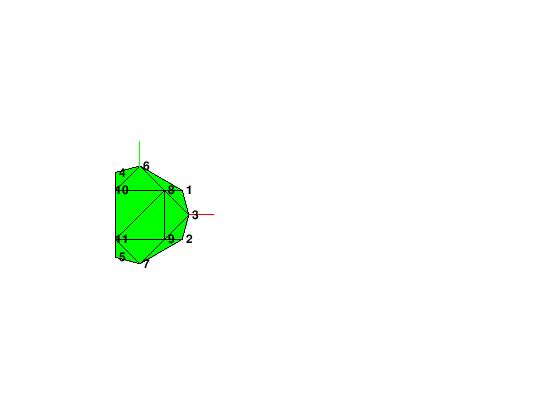

In [136]:
% Repeat process for an 11.0 3D setup
ls_dirs = [30 -30 0 120 -120 90 -90 45 -45 135 -135; ...
            0   0 0   0    0  0   0 45  45  45   45]';
[ls_groups, layout] = findLsTriplets(ls_dirs); % return also triangulation mesh for plotting
#figure, subplot(121), plotTriangulation(layout); view(50,30), zoom(2) % plot triangulation
figure, subplot(121), plotTriangulation(layout); % plot triangulation
layoutInvMtx = invertLsMtx(ls_dirs, ls_groups);
% Generate a regular 2D grid of panning directions covering the sphere
aziRes = 5;
elevRes = 5;
[Elev, Azi] = meshgrid(-90:elevRes:90, 0:aziRes:360);
src_dirs3D = [Azi(:) Elev(:)];
% Get VBAP gains
gains3D = vbap(src_dirs3D, ls_groups, layoutInvMtx);

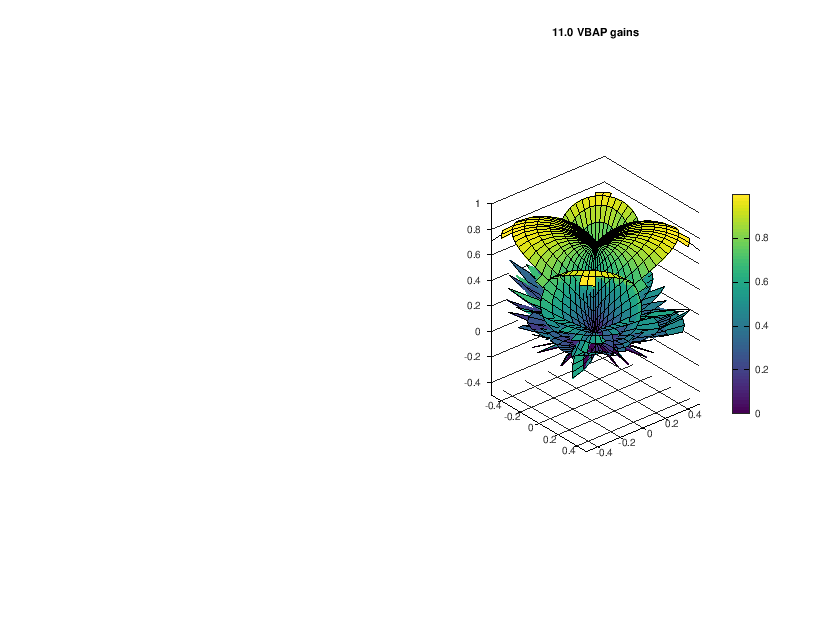

In [135]:
% Plot panning gains
ls_num = size(ls_dirs,1);
[nAzi, nElev] = size(Azi);
[X,Y,Z] = sph2cart(Azi*pi/180,Elev*pi/180,1);
subplot(122)
hold on
for nl = 1:ls_num
    gains_grid_nl = reshape(gains3D(:,nl), nAzi, nElev);
    surf(gains_grid_nl.*X,gains_grid_nl.*Y,gains_grid_nl.*Z,gains_grid_nl);
end
axis([-1 1 -1 1 -0.5 1]), axis equal
colorbar, view(50,30), zoom(2), grid
title('11.0 VBAP gains')
%h = gcf; h.Position(3:4) = 1.5*h.Position(3:4);
h = gcf;
pos = get(h, 'Position');
pos(3:4) .*= 1.5;
set(h, 'Position', pos)

## EXAMPLE 3: Spreading by amplitude panning

Spreading of sources by means of amplitude panning has two useful
applications: 

* a.)creating synthetic sounds at arbitrary directions that have
perceptually some spatial extent (see [ref.2&3]),  and 
* b.)creating panning
gains for multichannel systems that avoid the "loudspeaker detent" effect
of sources collapsing to the loudspeakers or appearing spread at certain
directions and very point-like at others (see [ref.3]).

This second
application is useful also on the design of stable hybrid ambisonic
decoders (see [ref.6]).

Spread can be controlled if an extra spread parameter is added to the
vbap() function. This parameter determines the extent of the source in degrees. 
The spread effect is created by using auxiliary spread sources around the 
main panning direction. If no additional arguments are passed along the 
desired spread, a default of 8 auxiliary sources are used. Otherwise, an 
arbitrary number of auxiliary sources can be generated by an additional 
argument num_spread_src. For 3D cases, the spread sources are arranged on 
a ring around the panning direction. By default, a single ring is used. 
More rings can be generated by an extra argument num_spread_rings.

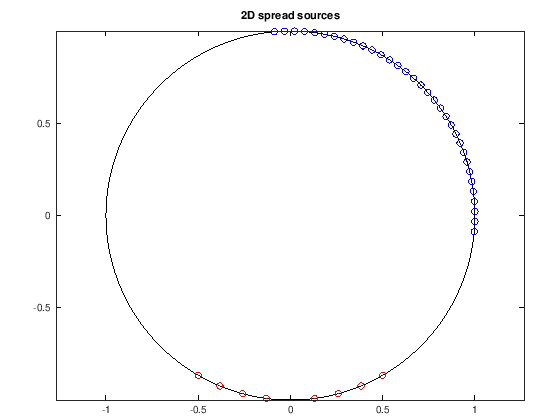

In [138]:
% plot spread source directions for a 2D setup
spread = 60;
U_spread1 = getSpreadSrcDirs(-90, spread);
spread = 100;
num_spread_src = 32;
U_spread2 = getSpreadSrcDirs(45, spread, num_spread_src);
U_circle = [cos(0:pi/100:2*pi)' sin(0:pi/100:2*pi)'];
figure
plot(U_circle(:,1), U_circle(:,2), 'k')
hold on
plot(U_spread1(:,1), U_spread1(:,2), 'ro') % spread source 1
plot(U_spread2(:,1), U_spread2(:,2), 'bo') % spread source 2
axis equal, title('2D spread sources')

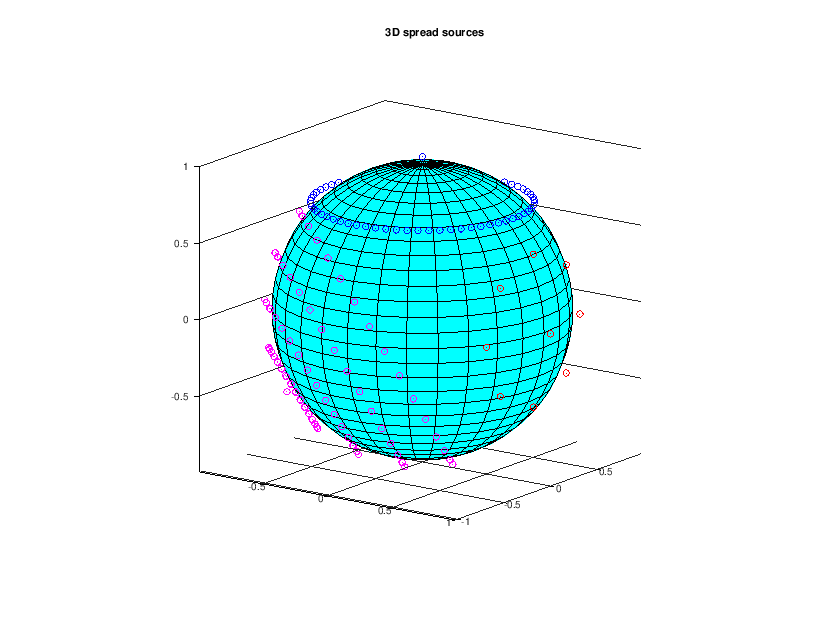

In [142]:
% plot spread source directions for a 3D setup
spread = 60;
U_spread1 = getSpreadSrcDirs([0 0], spread);
spread = 90;
num_spread_src = 64;
U_spread2 = getSpreadSrcDirs([0 90], spread, num_spread_src);
spread = 140;
num_spread_src = 32;
num_spread_rings = 4;
U_spread3 = getSpreadSrcDirs([-135 -30], spread, num_spread_src, num_spread_rings);

[Xs, Ys, Zs] = sphere(30);
C = ones(size(Zs));
figure
#surf(0.95*Xs, 0.95*Ys, 0.95*Zs, 1, 'facecolor','c')
surf(0.95*Xs, 0.95*Ys, 0.95*Zs, C, 'facecolor','c')
hold on
plot3(U_spread1(:,1), U_spread1(:,2), U_spread1(:,3), 'ro') % spread source 1
plot3(U_spread2(:,1), U_spread2(:,2), U_spread2(:,3), 'bo') % spread source 2
plot3(U_spread3(:,1), U_spread3(:,2), U_spread3(:,3), 'mo') % spread source 3
view(36,15), axis equal, title('3D spread sources')
#h = gcf; h.Position(3:4) = 1.5*h.Position(3:4);
h = gcf;
pos = get(h, 'Position');
pos(3:4) .*= 1.5;
set(h, 'Position', pos)

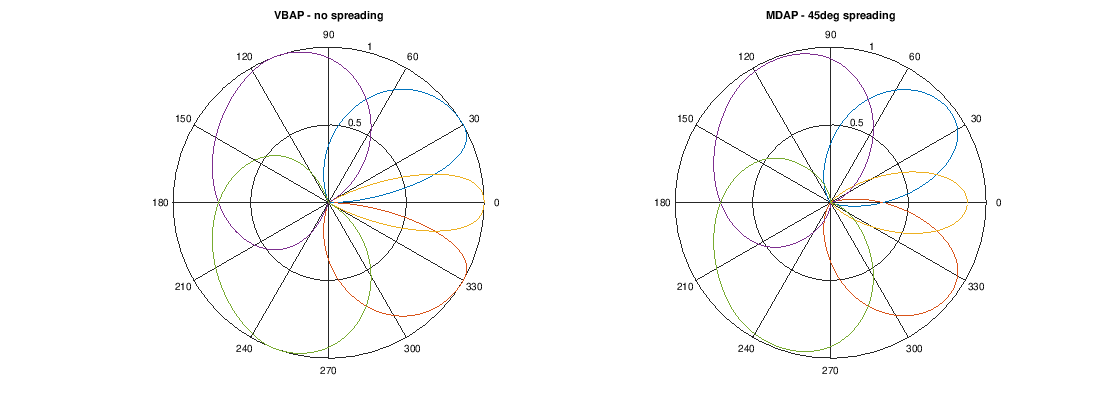

In [144]:
% compute 2D vbap gains for a 5.0 layout, with and without spreading
ls_dirs = [30 -30 0 110 -110]; % define a 2D 5.0 setup in degrees
ls_groups = findLsPairs(ls_dirs);
layoutInvMtx = invertLsMtx(ls_dirs, ls_groups);
src_dirs2D = (0:359)';
gains_nospread = vbap(src_dirs2D, ls_groups, layoutInvMtx);
spread = 45;
gains_spread = vbap(src_dirs2D, ls_groups, layoutInvMtx, spread);

% Plot panning gains
figure
subplot(121)
polar(src_dirs2D*ones(1,5)*pi/180, gains_nospread)
title('VBAP - no spreading')
subplot(122)
polar(src_dirs2D*ones(1,5)*pi/180, gains_spread)
title('MDAP - 45deg spreading')
#h = gcf; h.Position(3) = 2*h.Position(3);
h = gcf;
pos = get(h, 'Position');
pos(3) .*= 2;
set(h, 'Position', pos)